### Case study on Unsupervised Learning

##### 1. Read the dataset to the python environment.
##### 2. Try out different clustering models in the wine dataset.
##### 3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.



In [1]:
#import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data
data = pd.read_csv('Wine.csv')
data.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [3]:
data.shape

(178, 13)

In [4]:
#check for null values
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [6]:
data.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

<function matplotlib.pyplot.show(close=None, block=None)>

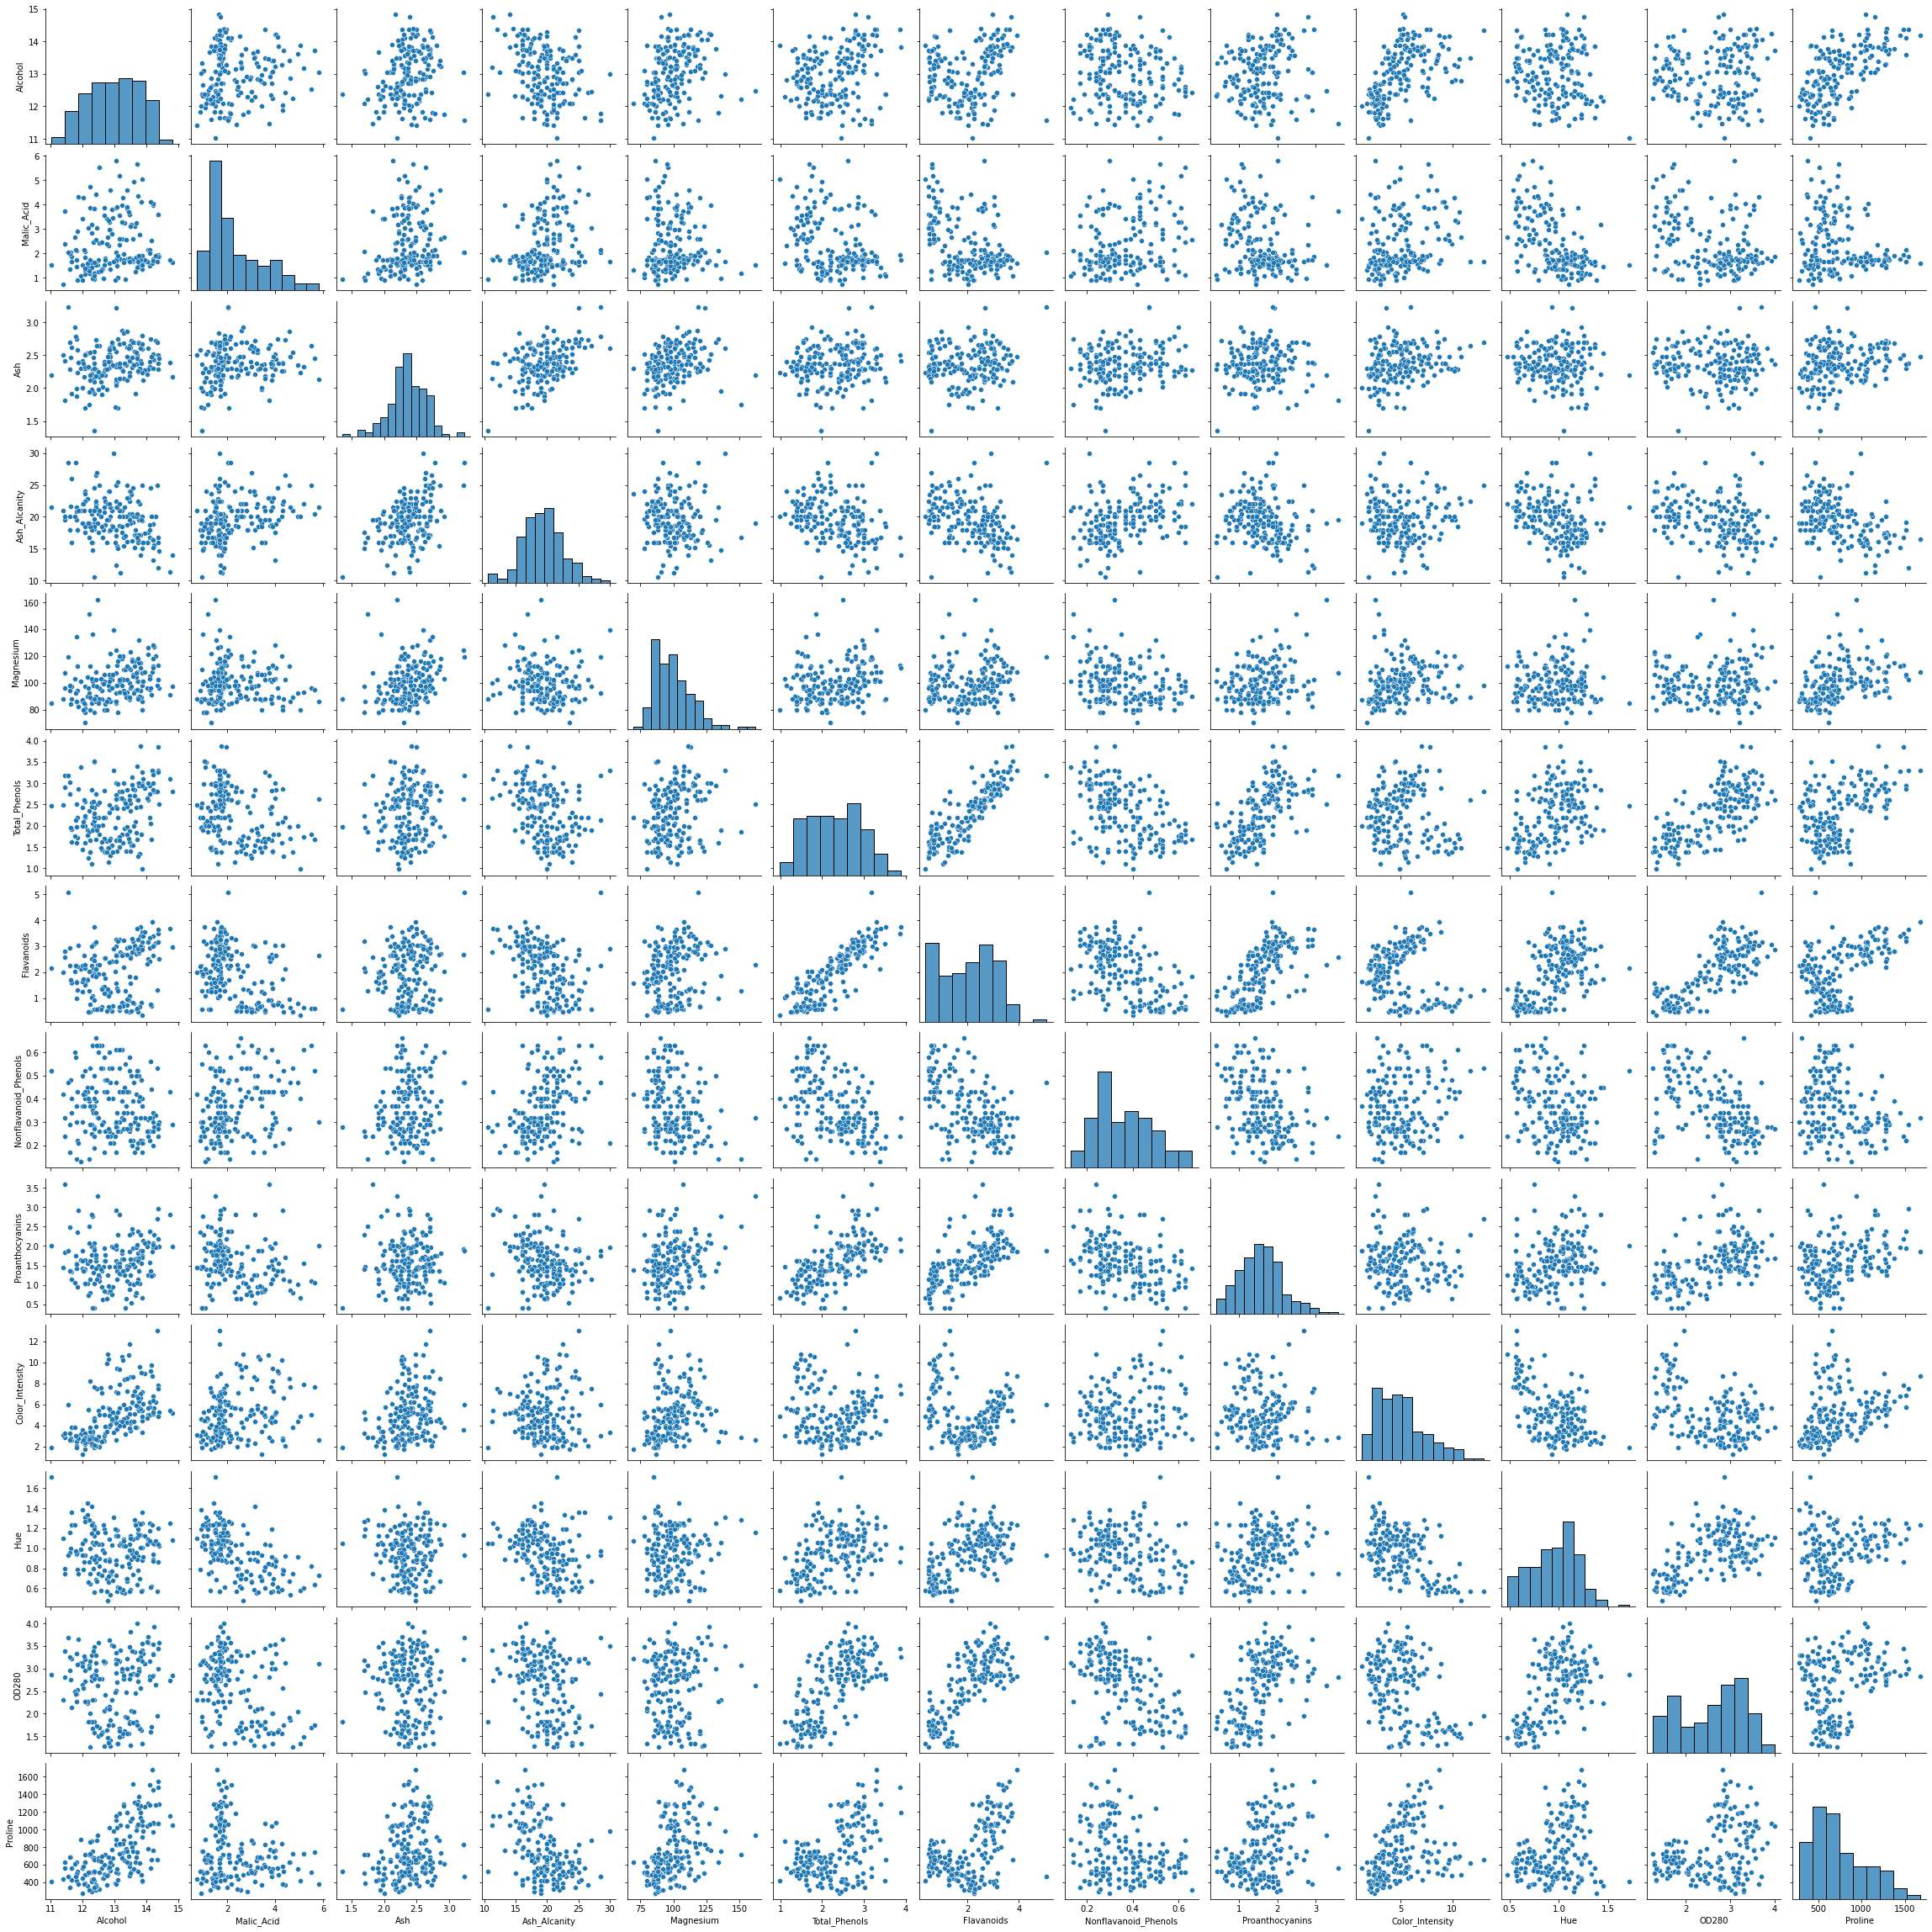

In [7]:
sns.pairplot(data)
plt.show

<AxesSubplot:>

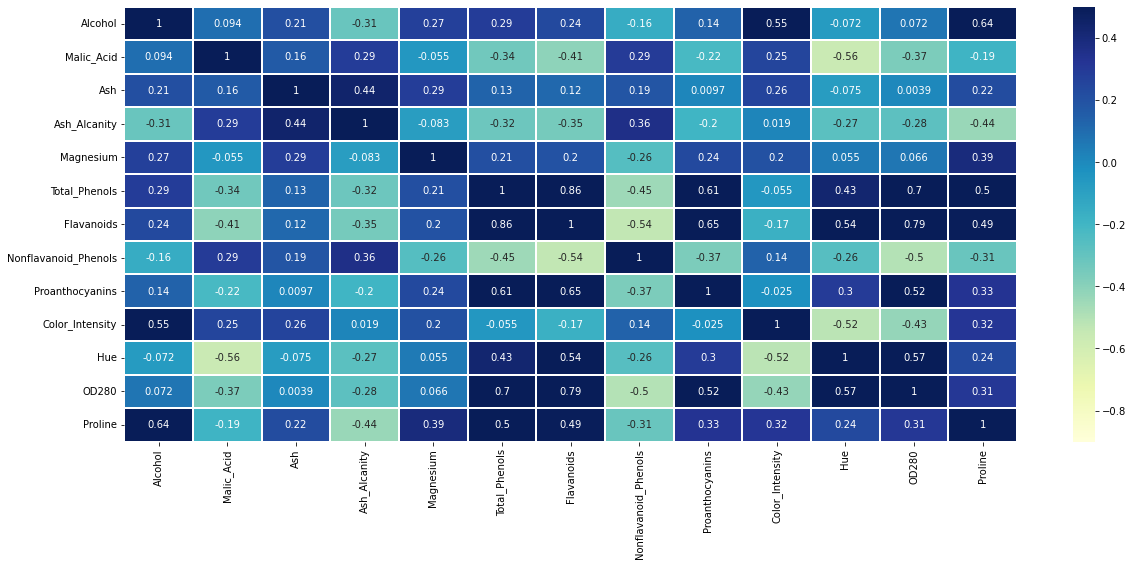

In [8]:
# Correlation Analysis 
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.9,vmax=0.5,annot=True,linewidth=0.2,cmap="YlGnBu")


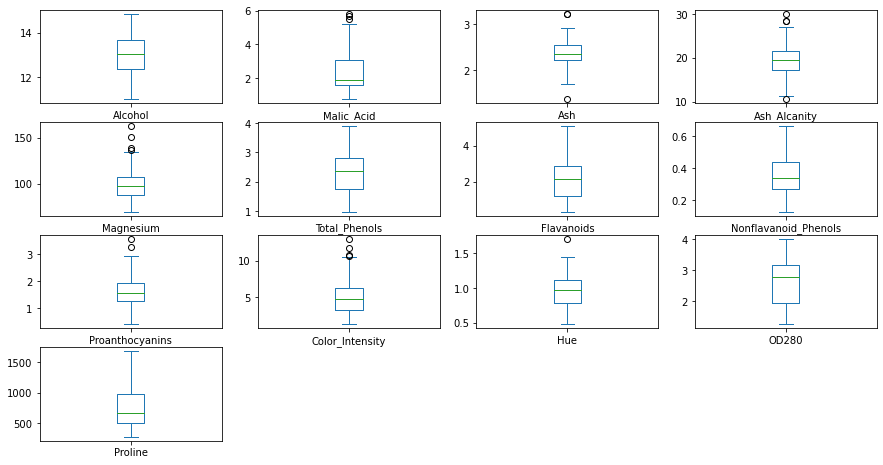

In [9]:
data.plot(kind='box',subplots=True,layout=(5,4),figsize=(15,10))
plt.show()

###### Standard Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df=scaler.fit_transform(data)
df=pd.DataFrame(df)
df.describe()


0             1             2             3             4   \
count  1.780000e+02  1.780000e+02  1.780000e+02  1.780000e+02  1.780000e+02   
mean  -8.619821e-16 -8.357859e-17 -8.657245e-16 -1.160121e-16 -1.995907e-17   
std    1.002821e+00  1.002821e+00  1.002821e+00  1.002821e+00  1.002821e+00   
min   -2.434235e+00 -1.432983e+00 -3.679162e+00 -2.671018e+00 -2.088255e+00   
25%   -7.882448e-01 -6.587486e-01 -5.721225e-01 -6.891372e-01 -8.244151e-01   
50%    6.099988e-02 -4.231120e-01 -2.382132e-02  1.518295e-03 -1.222817e-01   
75%    8.361286e-01  6.697929e-01  6.981085e-01  6.020883e-01  5.096384e-01   
max    2.259772e+00  3.109192e+00  3.156325e+00  3.154511e+00  4.371372e+00   

                 5             6             7             8             9   \
count  1.780000e+02  1.780000e+02  1.780000e+02  1.780000e+02  1.780000e+02   
mean  -2.972030e-16 -4.016762e-16  4.079134e-16 -1.699639e-16 -1.122697e-17   
std    1.002821e+00  1.002821e+00  1.002821e+00  1.002821e+00  1.002821e+00   
min   -2.107246e+00 -1.695971e+00 -1.868234e+00 -2.069034e+00 -1.634288e+00   
25%   -8.854682e-01 -8.275393e-01 -7.401412e-01 -5.972835e-01 -7.951025e-01   
50%    9.595986e-02  1.061497e-01 -1.760948e-01 -6.289785e-02 -1.592246e-01   
75%    8.089974e-01  8.490851e-01  6.095413e-01  6.291754e-01  4.939560e-01   
max    2.539515e+00  3.062832e+00  2.402403e+00  3.485073e+00  3.435432e+00   

                 10            11            12  
count  1.780000e+02  1.780000e+02  1.780000e+02  
mean   3.717376e-16  2.919013e-16 -7.484650e-18  
std    1.002821e+00  1.002821e+00  1.002821e+00  
min   -2.094732e+00 -1.895054e+00 -1.493188e+00  
25%   -7.675624e-01 -9.522483e-01 -7.846378e-01  
50%    3.312687e-02  2.377348e-01 -2.337204e-01  
75%    7.131644e-01  7.885875e-01  7.582494e-01  
max    3.301694e+00  1.960915e+00  2.971473e+00

### K-Means Clustering

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss=[]
silhouette={}
for i in range(2,11):
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    silhouette[i]=silhouette_score(df,kmeans.labels_, metric='euclidean')

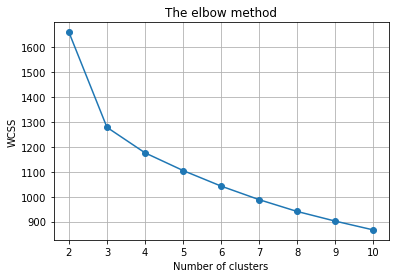

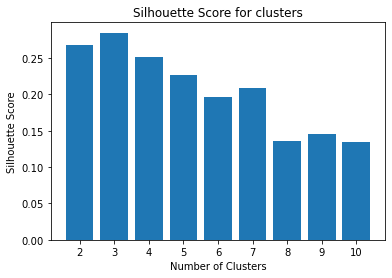

In [12]:
plt.plot(range(2,len(wcss)+2), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The elbow method')
plt.grid()
plt.show()

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center')
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.title('Silhouette Score for clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')


plt.show()

Here from the silhouette score graph we can under stand the silhouette score is greater for 3. so, we take no: of clusters=3

In [13]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(df)
category = kmeans.predict(df) 
category

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [14]:
df1=data.copy()
df1['category']=category
df1['category'].value_counts()

2    65
1    62
0    51
Name: category, dtype: int64

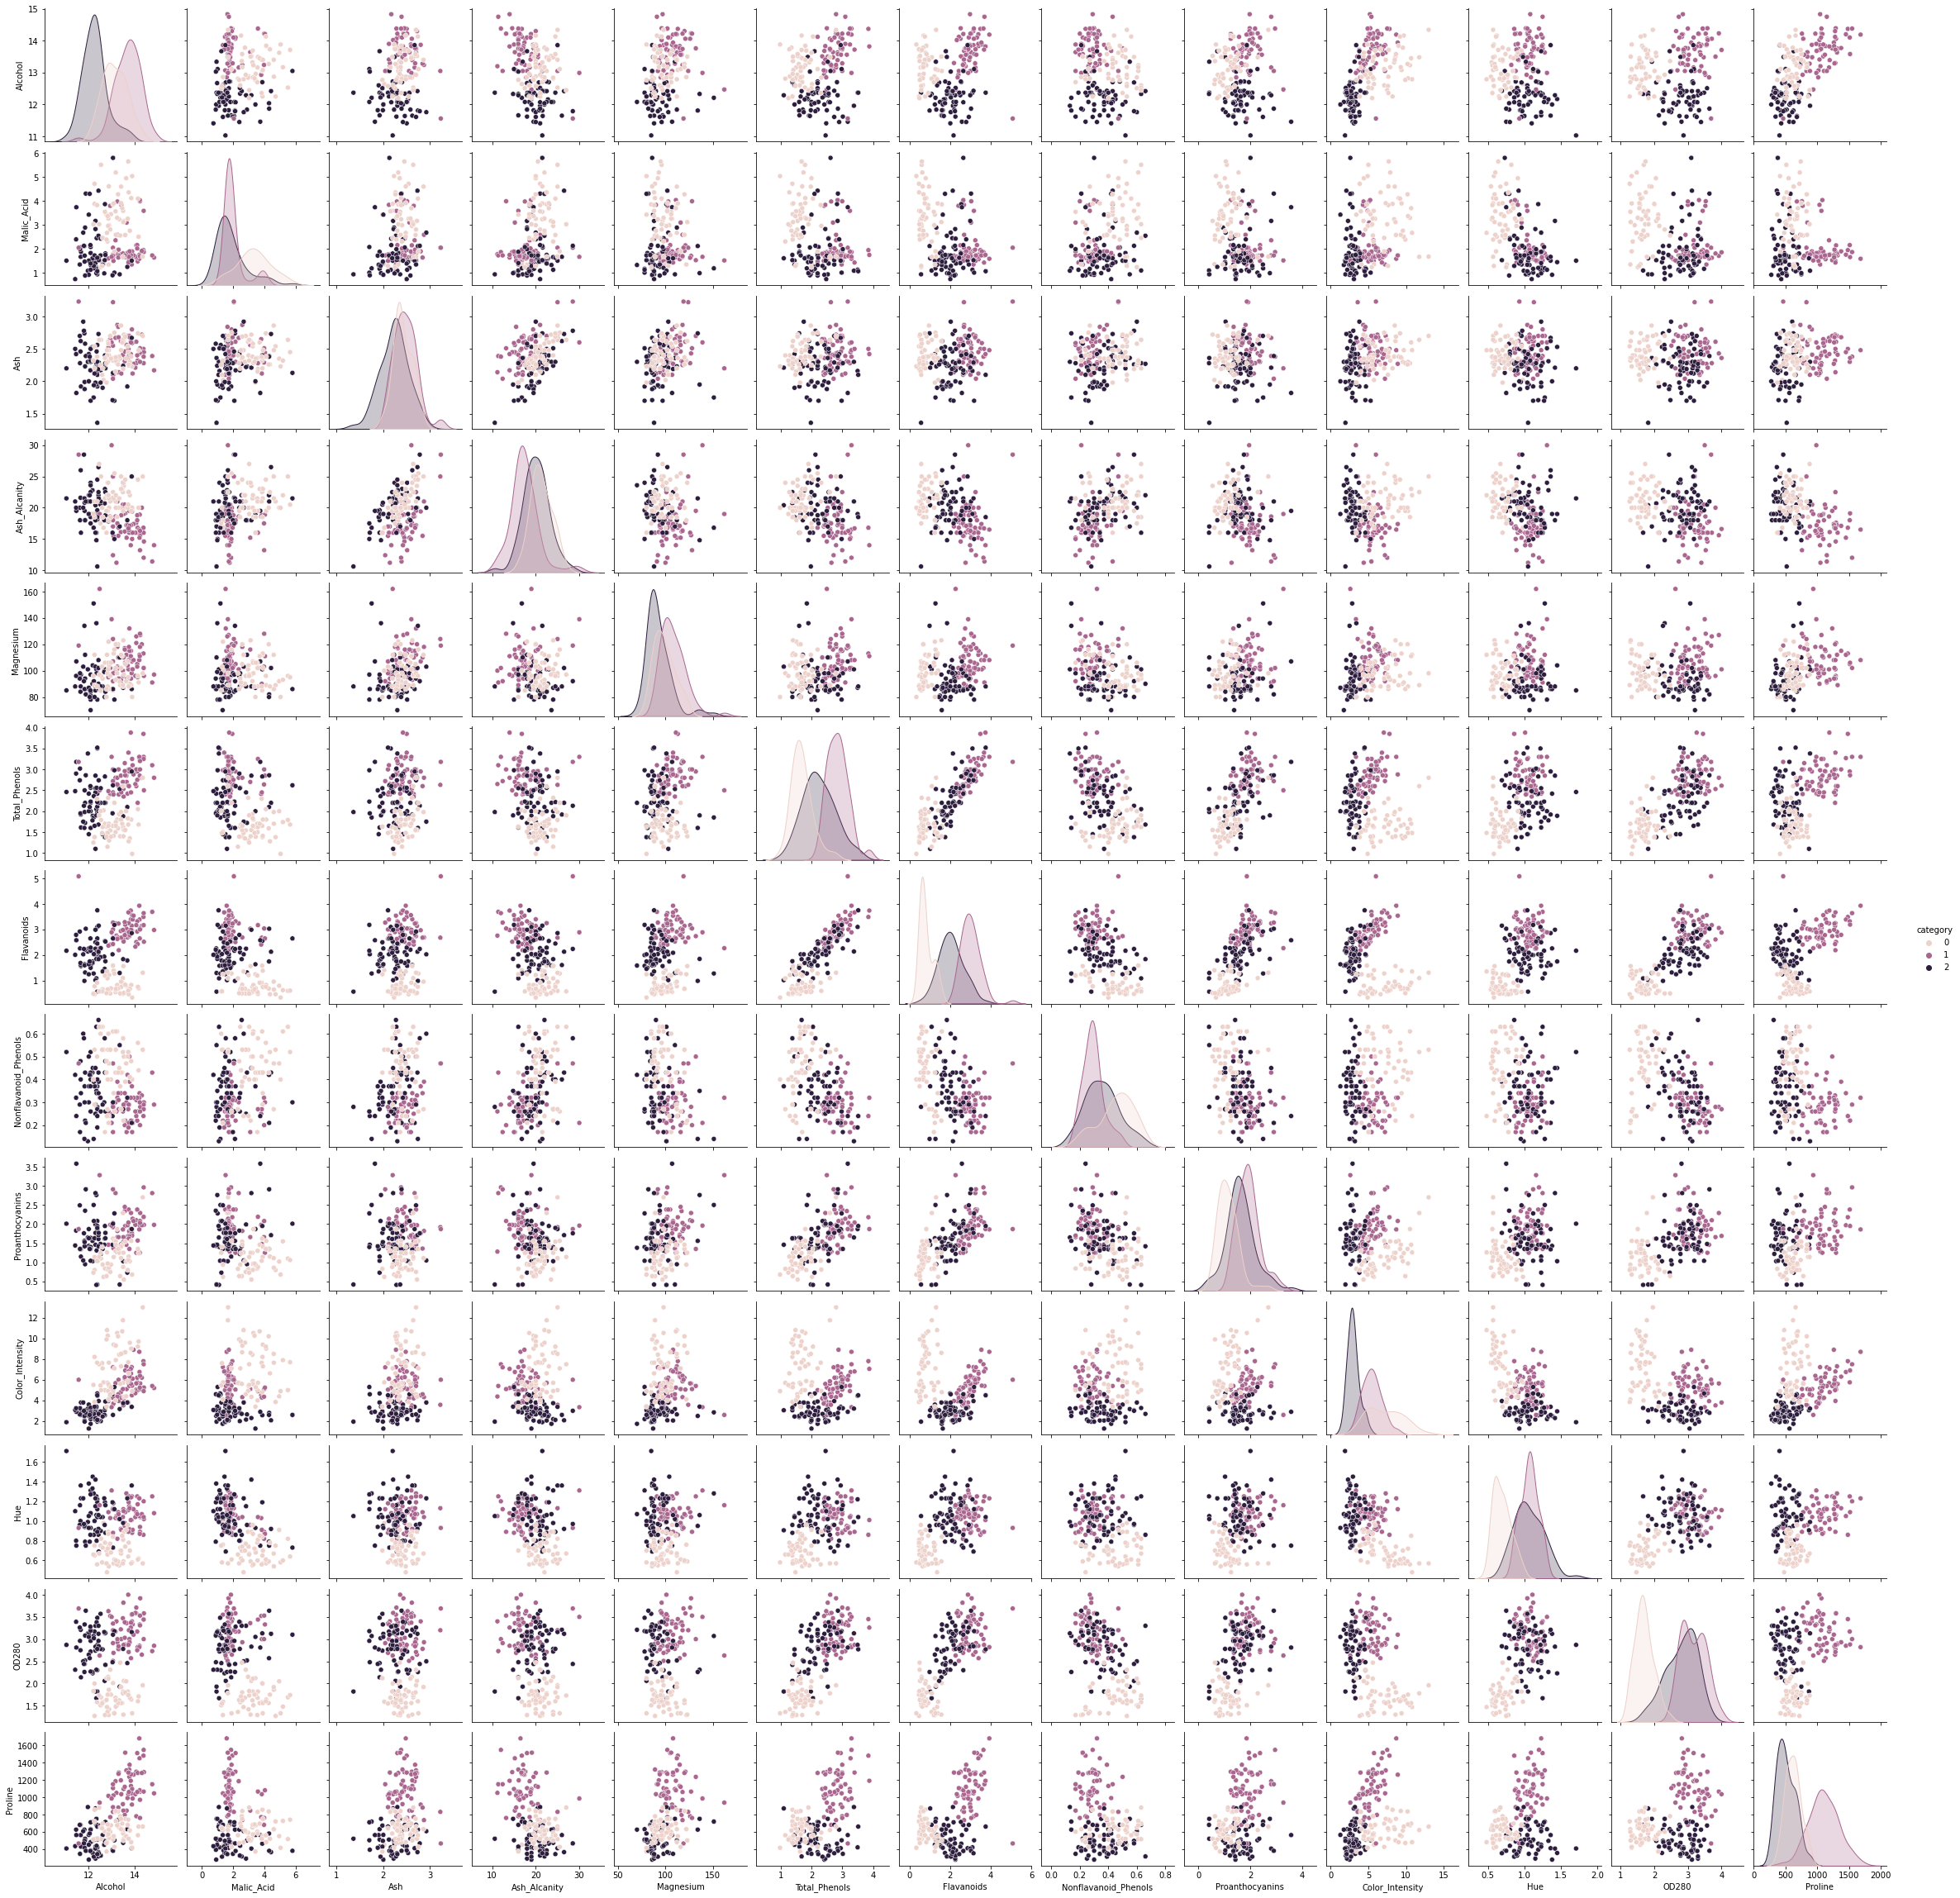

In [15]:
sns.pairplot(df1,kind='scatter',hue='category')
plt.show()


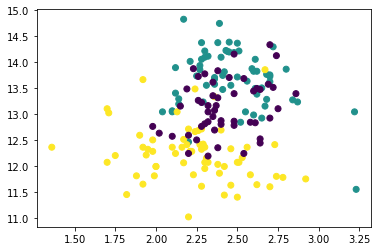

In [16]:
alcohol=data['Alcohol']
ash=data['Ash'] 
plt.scatter(ash,alcohol,c= category)
plt.show()

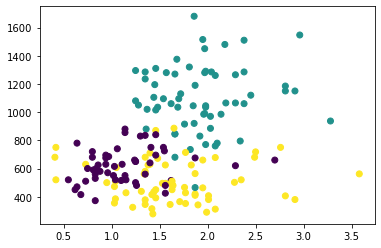

In [17]:
Proanthocyanins=data['Proanthocyanins']
Proline=data['Proline']
plt.scatter(Proanthocyanins,Proline,c= category)
plt.show()

###  Agglomerative Hierarchial Clustering

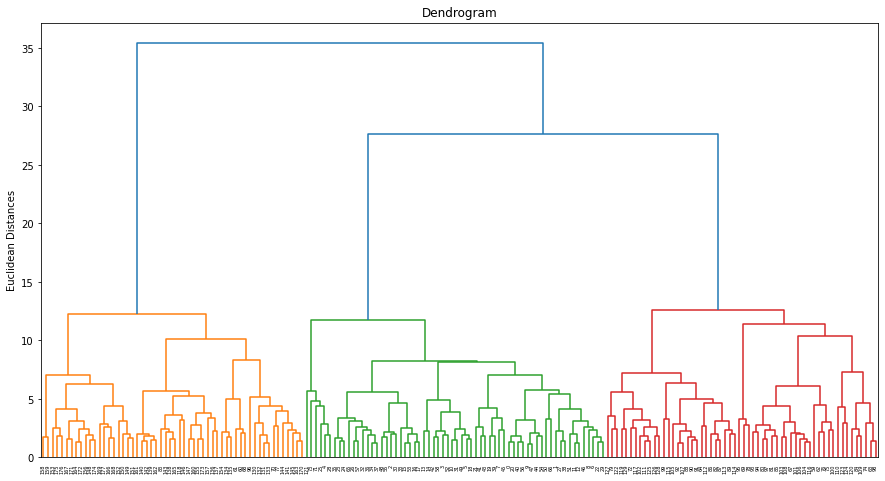

In [18]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(df,method='ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean Distances')
plt.show()

using longest line method, we found the no of clusters = 3

In [19]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
hc_category = hc.fit_predict(df)
hc_category

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [20]:
df2=df.copy()
df2['category']=hc_category
df2['category'].value_counts()

2    64
0    58
1    56
Name: category, dtype: int64

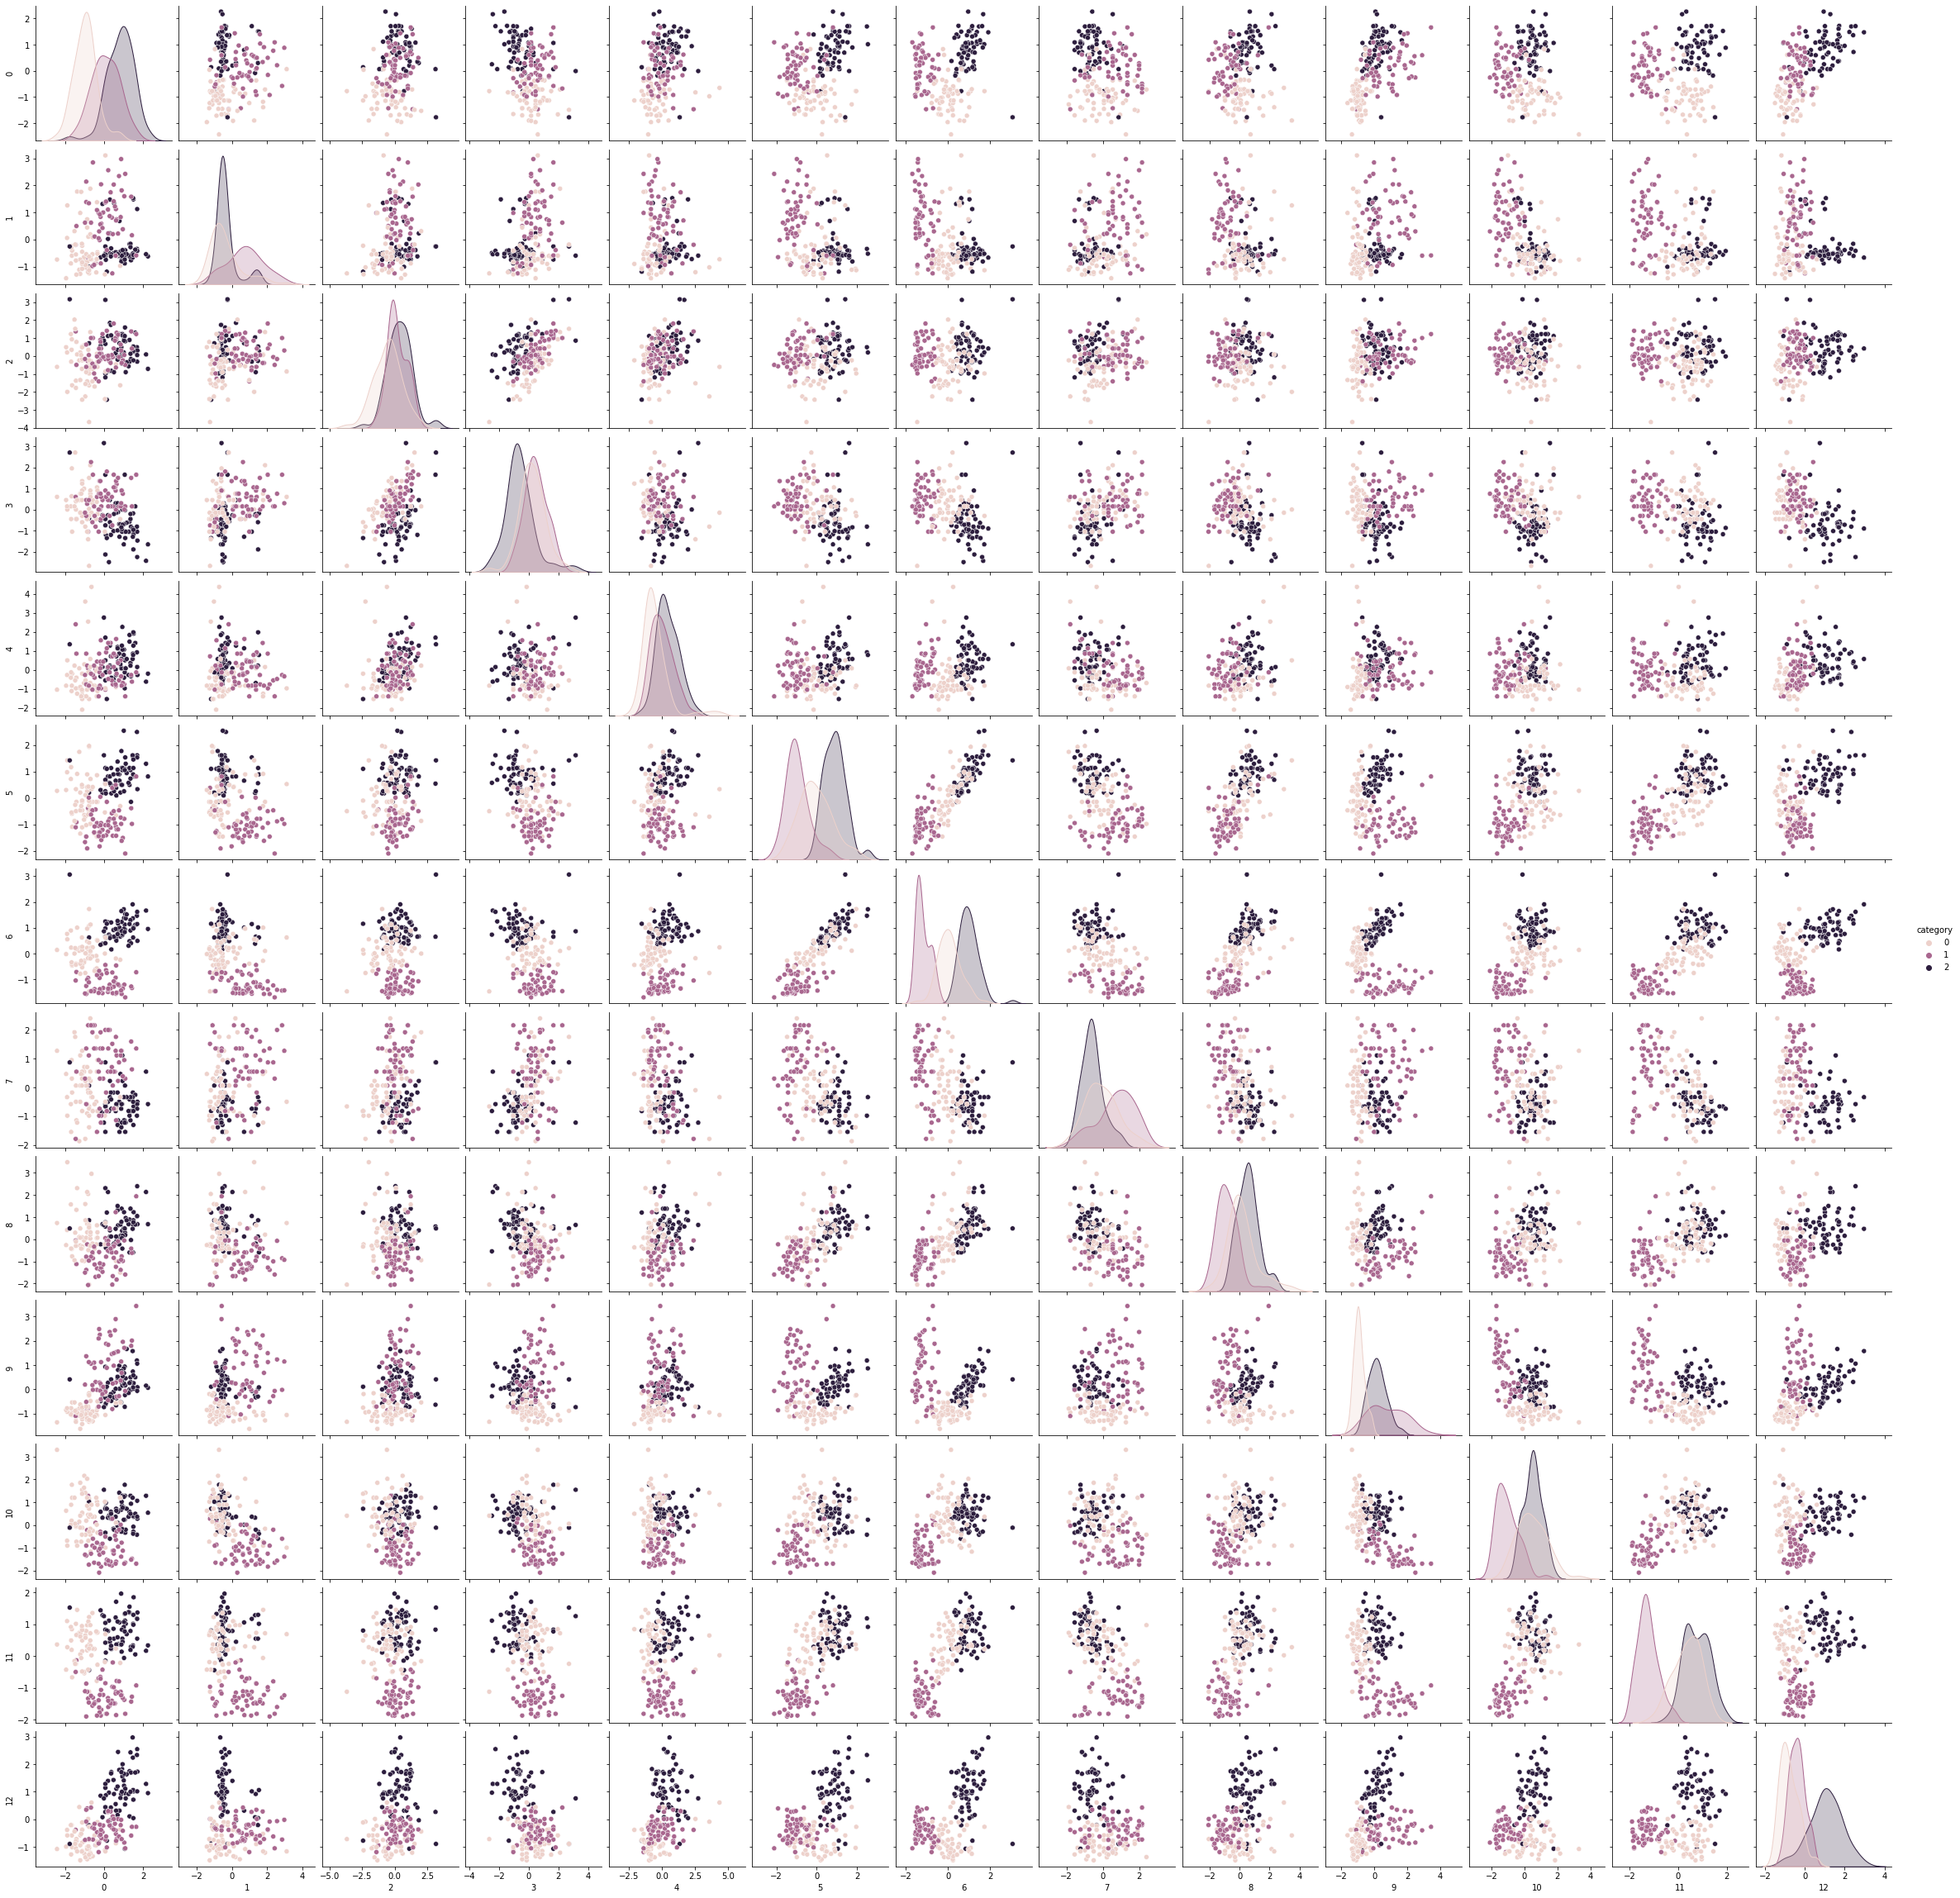

In [21]:
sns.pairplot(df2,kind='scatter',hue='category')
plt.show()


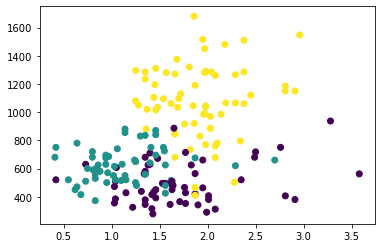

In [22]:
Proanthocyanins=data['Proanthocyanins']
Proline=data['Proline']
plt.scatter(Proanthocyanins,Proline,c=hc_category)
plt.show()

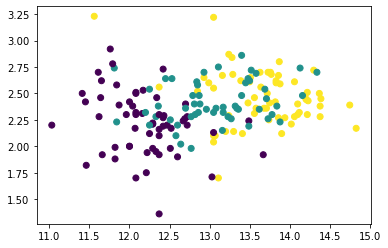

In [23]:
alcohol=data['Alcohol']
ash=data['Ash'] 
plt.scatter(alcohol,ash,c=hc_category)
plt.show()

#### since this is a small data set with only 13 columns, we do not do PCA since there will be data loss

### Principal Component Analysis

In [24]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(df)
x_pca= pca.transform(df)

In [25]:
explained_var_ratio = pca.explained_variance_ratio_
print(sum(explained_var_ratio))

0.5540633835693527


In [26]:
# Convert to data frame
principal_df = pd.DataFrame(data = x_pca, columns = ['PC1', 'PC2'])
# Shape and preview
print(principal_df.shape)
principal_df.head()

(178, 2)


PC1       PC2
0  3.316751 -1.443463
1  2.209465  0.333393
2  2.516740 -1.031151
3  3.757066 -2.756372
4  1.008908 -0.869831

In [27]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(df)
category = kmeans.predict(df) 
category

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

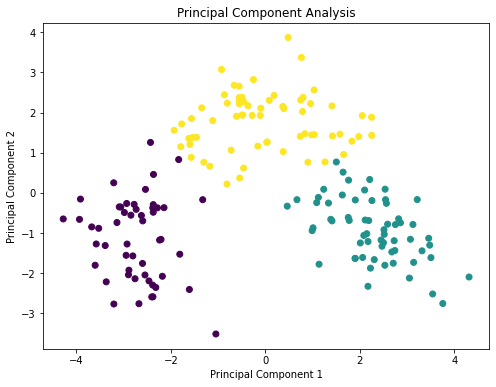

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1],c=category)
plt.title('Principal Component Analysis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [29]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
pca.fit(df)
x_pca= pca.transform(df)

In [30]:
x_pca.shape

(178, 10)

In [31]:
explained_var_ratio = pca.explained_variance_ratio_

In [32]:
print(sum(explained_var_ratio))

0.9616971684450643
